In [2]:
import numpy as np
import pandas as pd

from IPython.display import display


## Przepustowość każdej klasy w każdym systemie

In [3]:
def calculate_lambdas_ir(p_table, lambda_we):
  ilosc_kolejek = p_table.shape[1] - 2 #odejmujemy wejscie i wyjscie
  A = np.zeros((ilosc_kolejek, ilosc_kolejek))
  np.fill_diagonal(A, 1)
  b = lambda_we * p_table[0][1:-1]
  for row_i, p_row in enumerate(p_table):
    if row_i >=1 and row_i<=A.shape[0]:
      A[row_i -1] = A[row_i -1] - p_table[row_i][1:-1]
    
  A = np.transpose(A)
  return np.linalg.solve(A, b)

In [4]:
columns = ["Wejście",
           "Lądowanie",
          "Przegląd",
          "Serwis",
          "Tankowanie",
          "Pasażerowie",
          "Wylot", 
           "Wyjscie"]


## Klasa: Samoloty Krótkodystansowe r = 0 

In [5]:
p_shortdist = np.zeros((len(columns), len(columns)))
p_shortdist[0][1] = 1
p_shortdist[1][2] = 1
p_shortdist[2][3] = 0.1
p_shortdist[2][4] = 0.2
p_shortdist[2][5] = 0.7
p_shortdist[3][2] = 1
p_shortdist[4][5] = 1
p_shortdist[5][6] = 1
p_shortdist[6][7] = 1

df_p_shortdist = pd.DataFrame(p_shortdist, columns = columns, index = columns)
display(df_p_shortdist)
print("\n Sprawdzanie sumy wierszami")
display(df_p_shortdist.sum(axis=1))

,Wejście,Lądowanie,Przegląd,Serwis,Tankowanie,Pasażerowie,Wylot,Wyjscie
Wejście,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Lądowanie,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Przegląd,0.0,0.0,0.0,0.1,0.2,0.7,0.0,0.0
Serwis,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Tankowanie,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Pasażerowie,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Wylot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Wyjscie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



 Sprawdzanie sumy wierszami


Wejście        1.0
Lądowanie      1.0
Przegląd       1.0
Serwis         1.0
Tankowanie     1.0
Pasażerowie    1.0
Wylot          1.0
Wyjscie        0.0
dtype: float64

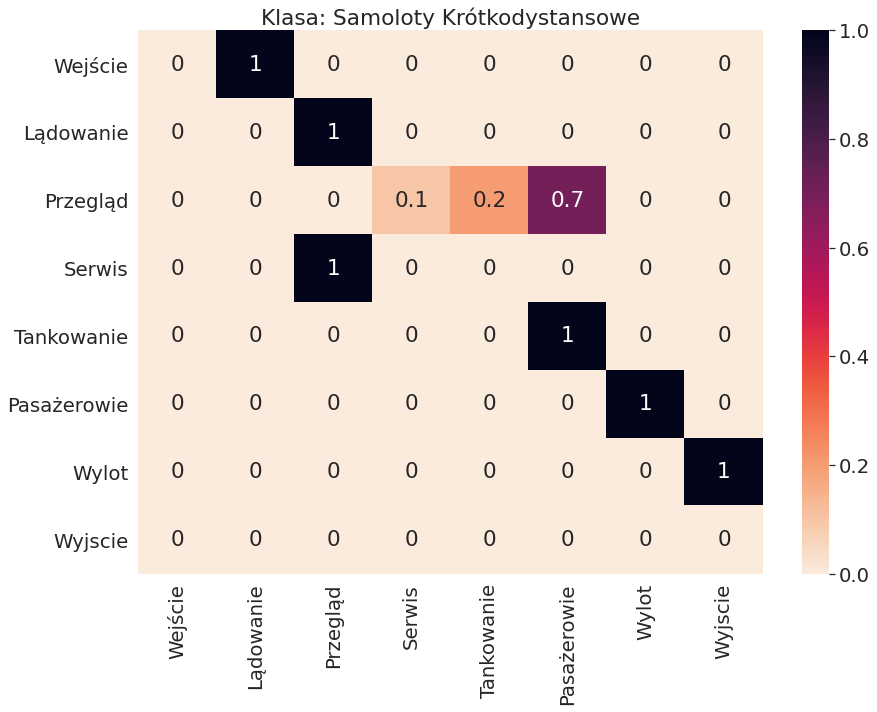

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(14, 10)})
sns.set(font_scale=1.8)

sns.heatmap(df_p_shortdist, annot=True, fmt="g", cmap = "rocket_r")
plt.title("Klasa: Samoloty Krótkodystansowe")
plt.show()

## Klasa: Samoloty Długodystansowe, `r=1`

In [7]:
p_longdist = np.zeros((len(columns), len(columns)))
p_longdist[0][1] = 1
p_longdist[1][2] = 1
p_longdist[2][3] = 0.1
p_longdist[2][4] = 0.9
p_longdist[3][2] = 1
p_longdist[4][5] = 1
p_longdist[5][6] = 1
p_longdist[6][7] = 1

df_p_longdist = pd.DataFrame(p_longdist, columns = columns, index = columns)
display(df_p_longdist)
print("\n Sprawdzanie sumy wierszami")
display(df_p_longdist.sum(axis=1))

,Wejście,Lądowanie,Przegląd,Serwis,Tankowanie,Pasażerowie,Wylot,Wyjscie
Wejście,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Lądowanie,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Przegląd,0.0,0.0,0.0,0.1,0.9,0.0,0.0,0.0
Serwis,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Tankowanie,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Pasażerowie,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Wylot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Wyjscie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



 Sprawdzanie sumy wierszami


Wejście        1.0
Lądowanie      1.0
Przegląd       1.0
Serwis         1.0
Tankowanie     1.0
Pasażerowie    1.0
Wylot          1.0
Wyjscie        0.0
dtype: float64

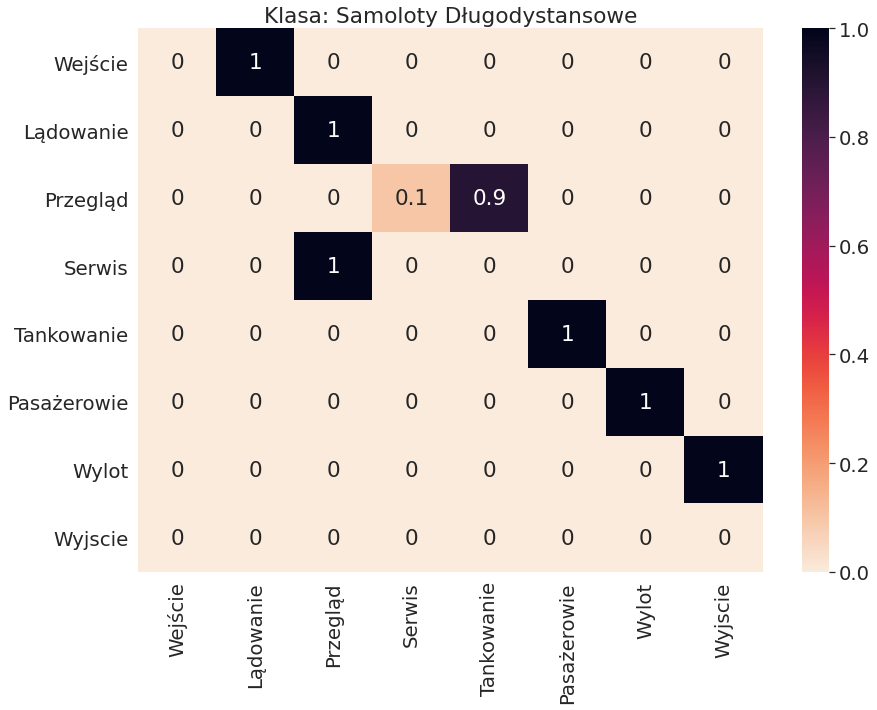

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(14, 10)})
sns.set(font_scale=1.8)

sns.heatmap(df_p_longdist, annot=True, fmt="g", cmap = "rocket_r")
plt.title("Klasa: Samoloty Długodystansowe")

plt.show()

## Klasa: Samoloty Towarowe `r=2`

In [9]:
columns = ["Wejście",
           "Lądowanie",
          "Przegląd",
          "Serwis",
          "Tankowanie",
          "Towary",
          "Wylot", 
           "Wyjscie"]

In [10]:
p_transport = np.zeros((len(columns), len(columns)))
p_transport[0][1] = 1
p_transport[1][2] = 1
p_transport[2][3] = 0.1
p_transport[2][4] = 0.7
p_transport[2][5] = 0.2
p_transport[3][2] = 1
p_transport[4][5] = 1
p_transport[5][6] = 1
p_transport[6][7] = 1

df_p_transport = pd.DataFrame(p_transport, columns = columns, index = columns)
display(df_p_transport)
print("\n Sprawdzanie sumy wierszami")
display(df_p_transport.sum(axis=1))

,Wejście,Lądowanie,Przegląd,Serwis,Tankowanie,Towary,Wylot,Wyjscie
Wejście,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Lądowanie,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Przegląd,0.0,0.0,0.0,0.1,0.7,0.2,0.0,0.0
Serwis,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Tankowanie,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Towary,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Wylot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Wyjscie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



 Sprawdzanie sumy wierszami


Wejście       1.0
Lądowanie     1.0
Przegląd      1.0
Serwis        1.0
Tankowanie    1.0
Towary        1.0
Wylot         1.0
Wyjscie       0.0
dtype: float64

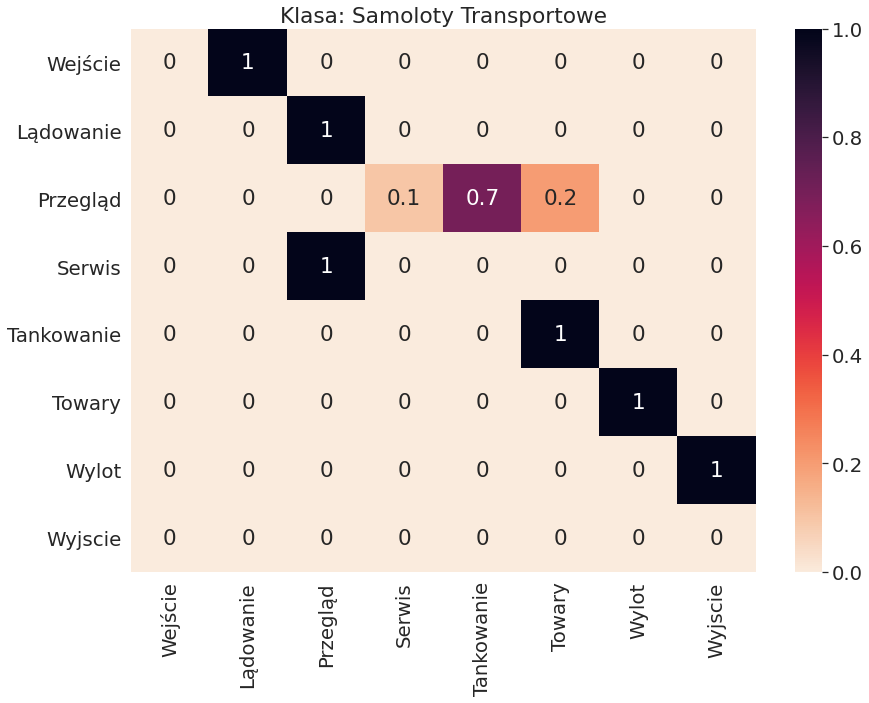

In [11]:
sns.set(rc={'figure.figsize':(14, 10)})
sns.set(font_scale=1.8)

sns.heatmap(df_p_transport, annot=True, fmt="g", cmap = "rocket_r")
plt.title("Klasa: Samoloty Transportowe")

plt.show()

## LAMBDAS 

In [12]:
lambda_we_r = [1.8, 1.2, 1]
lambdas_ir_list = []
p_tables_r = [p_shortdist, p_longdist, p_transport]
for p_table, lambda_we in zip(p_tables_r, lambda_we_r):
  print("---------------")
  print("lambda = ", lambda_we)
  display(pd.DataFrame(p_table))
  lambdas_ir = calculate_lambdas_ir(p_table, lambda_we)

  print("Przepustowość tej klasy lambda_ir = ", lambdas_ir)
  print("\n")

  lambdas_ir_list.append(lambdas_ir)

---------------
lambda =  1.8


,0,1,2,3,4,5,6,7
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.1,0.2,0.7,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Przepustowość tej klasy lambda_ir =  [1.8 2.  0.2 0.4 1.8 1.8]


---------------
lambda =  1.2


,0,1,2,3,4,5,6,7
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.1,0.9,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Przepustowość tej klasy lambda_ir =  [1.2        1.33333333 0.13333333 1.2        1.2        1.2       ]


---------------
lambda =  1


,0,1,2,3,4,5,6,7
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.1,0.7,0.2,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Przepustowość tej klasy lambda_ir =  [1.         1.11111111 0.11111111 0.77777778 1.         1.        ]




#### Uzupełnianie lambdas_ir o systemy, ktore nie dotycza danej klasy 



In [13]:
lambdas_ir_arr = np.zeros((7, 3))
lambdas_ir_arr

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [14]:
for i in range(7):
  for r in range(3):
    lambdas_i = lambdas_ir_list[r]
    if r<=1: 
      #pasażerskie 
      if i < 5:
        lambdas_ir_arr[i][r] = lambdas_i[i]
      elif i == 5:
        lambdas_ir_arr[6][r] = lambdas_i[i]

    elif r==2: 
      #towarowe 
      if i < 4:
        lambdas_ir_arr[i][r] = lambdas_i[i]
      elif i >=4 and i <6 :
        lambdas_ir_arr[i+1][r] = lambdas_i[i]

lambdas_ir_arr

array([[1.8       , 1.2       , 1.        ],
       [2.        , 1.33333333, 1.11111111],
       [0.2       , 0.13333333, 0.11111111],
       [0.4       , 1.2       , 0.77777778],
       [1.8       , 1.2       , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.8       , 1.2       , 1.        ]])

Zera w tabeli `lambdas_ir_arr` oznaczają, że klasa nie korzysta z tego systemu/stanowiska. 



## Liczba stanowisk: 

In [15]:

m_i = [2, #0 pasy ladowania
       6, #1 przeglad
       2, #2 serwisowe stanowska
       5, #3 tankowanie
       3, #4 pasazerowie
       2, #5 towary
       3]  #6 pasy wylotu


len(m_i)


7

Pewne przyjęte wartości mi dla każdej klasy `r` i stanowska `i`. 

In [16]:
# mi = 1/czas obslugi (h) 

mi_ir = np.zeros([7,3])
mi_ir[0,:] = np.array([4, 4, 4])
mi_ir[1,:] = np.array([1, 0.8, 1])
mi_ir[2,:] = np.array([0.25, 0.2, 0.3])
mi_ir[3,:] = np.array([3, 3/2, 2])
mi_ir[4,:] = np.array([3/2, 1, 0])
mi_ir[5,:] = np.array([0, 0, 2])
mi_ir[6,:] = np.array([2, 2, 2])

mi_ir

array([[4.  , 4.  , 4.  ],
       [1.  , 0.8 , 1.  ],
       [0.25, 0.2 , 0.3 ],
       [3.  , 1.5 , 2.  ],
       [1.5 , 1.  , 0.  ],
       [0.  , 0.  , 2.  ],
       [2.  , 2.  , 2.  ]])

##  Względna intensywność obsługi każdej klasy w każdym systemie `ro_ir`


In [17]:
ro_ir = np.zeros([7,3])


for i in range(7):
  for r in range(3):
    ro_ir[i][r] = lambdas_ir_arr[i][r]/(m_i[i] * mi_ir[i][r])

ro_ir

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


array([[0.225     , 0.15      , 0.125     ],
       [0.33333333, 0.27777778, 0.18518519],
       [0.4       , 0.33333333, 0.18518519],
       [0.02666667, 0.16      , 0.07777778],
       [0.4       , 0.4       ,        nan],
       [       nan,        nan, 0.25      ],
       [0.3       , 0.2       , 0.16666667]])

## Średni czas obsługi samoloty

`nan` oznacza, że nie samoloty r-tej klasy nie są obługiwane przez i-te stanowsko

In [18]:
def single_Q_ir(i, r, m_i, ro_i):
    x = ro_ir[i][r]/(1-ro_i)
    y = (m_i[i] * ro_i)**m_i[i]/(np.math.factorial(m_i[i])*(1-ro_i))

    temp_list = [(m_i[i]*ro_i)**ki/np.math.factorial(ki) for ki in range(m_i[i]-1)]
      
    z = 1/(sum(temp_list) + (m_i[i]*ro_i)**m_i[i]/np.math.factorial(m_i[i]) * (1/(1-ro_i)))

    return  x*z*y

In [19]:
Q_ir = np.zeros((7,3))

for i in range(7):
  ro_i = np.nan_to_num(ro_ir)[i].sum()
  for r in range(3):
    Q_ir[i][r] = single_Q_ir(i, r, m_i, ro_i)
    # if r <2:
    #   if i!= 5:
    #     #pasazerskie bez towarow
    #     Q_ir[i][r] = single_Q_ir(i, r, m_i, ro_i)
    #   else:
    #       Q_ir[i][r] = 0
    # elif r==2:
    #   if i!= 4:
    #     print(ro_i, i)
    #     #towarowe
    #     Q_ir[i][r] = single_Q_ir(i, r, m_i, ro_i)
    #   else:
    #     Q_ir[i][r] = 0

Q_ir


array([[2.25000000e-01, 1.50000000e-01, 1.25000000e-01],
       [9.60409250e-01, 8.00341042e-01, 5.33560694e-01],
       [4.68295324e+00, 3.90246103e+00, 2.16803391e+00],
       [4.57595849e-04, 2.74557510e-03, 1.33465456e-03],
       [1.54423592e+00, 1.54423592e+00,            nan],
       [           nan,            nan, 4.76190476e-02],
       [5.14285714e-01, 3.42857143e-01, 2.85714286e-01]])

## Średnie liczby zgłoszeń klasy `r` w każdym systemie `i`

`nan` oznacza, że nie samoloty r-tej klasy nie są obługiwane przez i-te stanowsko



In [20]:
K_ir = np.zeros((7,3))

for i in range(7):
  for r in range(3):
    K_ir[i][r] = m_i[i]* ro_ir[i][r] + Q_ir[i][r]

In [21]:
K_ir

array([[0.675     , 0.45      , 0.375     ],
       [2.96040925, 2.46700771, 1.64467181],
       [5.48295324, 4.5691277 , 2.53840428],
       [0.13379093, 0.80274558, 0.39022354],
       [2.74423592, 2.74423592,        nan],
       [       nan,        nan, 0.54761905],
       [1.41428571, 0.94285714, 0.78571429]])

## OPTYMALIZACJA

In [22]:
m_nzi = []
for i in range(7):
  ro_i = np.nan_to_num(ro_ir)[i].sum()
  m_nzi.append(m_i[i] - m_i[i]*ro_i)

m_nzi

[1.0,
 1.2222222222222223,
 0.16296296296296275,
 3.6777777777777776,
 0.5999999999999996,
 1.5,
 1.0]

In [23]:
C1_ij = np.random.normal(size=(7, 3))
C1_ij

array([[ 0.21892687, -0.29385536,  0.92102532],
       [ 0.25791281, -1.17418658,  0.43563864],
       [-1.67023453, -1.97976237, -0.06929701],
       [ 0.59879992,  0.15867614,  0.70007869],
       [-0.5715622 ,  1.12831726,  0.74172855],
       [ 0.71509041, -0.8985788 ,  1.57869575],
       [-0.95238804, -0.5674647 ,  1.19937942]])

In [25]:
C2_i = abs(np.random.normal(size=(7)))

C2_i

array([0.71168876, 1.90030405, 2.01662988, 0.98227138, 0.36909825,
       1.47454369, 0.03280761])

### Funcja kosztów do optymalizacji (min) 

In [26]:
def f_cost(m_nzi, Q_ir, C1_ij, C2_i, r=3):
  costs = np.zeros((len(m_nzi), r))
  for i in range(len(m_nzi)):
    for j in range(r):
      costs[i][j] = C1_ij[i][j] * Q_ir[i][j] + C2_i[i] * m_nzi[i]

  return sum(sum(np.nan_to_num(costs)))


In [27]:
f_cost(m_nzi, Q_ir, C1_ij, C2_i)

8.237427933030462

In [28]:
i = 2
j = 2
C1_ij[i][j] * Q_ir[i][j] + C2_i[i] * m_nzi[i]

0.17839771910655985

In [29]:
C2_i[2]

2.016629880838643

In [30]:
C2_i

array([0.71168876, 1.90030405, 2.01662988, 0.98227138, 0.36909825,
       1.47454369, 0.03280761])